In [4]:
import random
import matplotlib.pyplot as plt
from src.transform.transform import transform
from src.dataset.road_dataset import RoadDataset
from src.io.io import read_rgb

In [5]:
import albumentations as A

In [38]:
t = A.RandomCrop(
            height=512,
            width=512,
            always_apply=False,
            p=1,
        )

T = transform(
    train=False,
    input_size=512,
    hflip_p= 1,
    scale_limit= 1,
    rotate_limit= 0,
    shift_limit= 1,
    shif_scale_rotate_p= 1,
    random_crop_p= 1,
    border_mode= 0,
    gauss_noise_p= 1,
    perspective_p= 1,
    one_of_p= 1,
    blur_limit= 3,
    mean=[0.485, 0.456, 0.406],
    std=[0.229, 0.224, 0.225]
)

In [43]:
img_path = "/Users/riccardomusmeci/Developer/data/smart-arrotino/pothole/dataset/split/train/masks/b81e4517-126.jpg"
img = read_rgb(img_path)

In [44]:
img.shape

(640, 480, 3)

In [46]:
for _ in range(100):
    _img = T(image=img)["image"]

In [48]:
_img.shape

(512, 512, 3)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


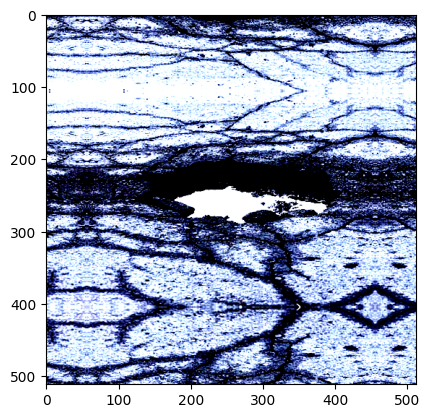

In [31]:
plt.imshow(img)

0 1


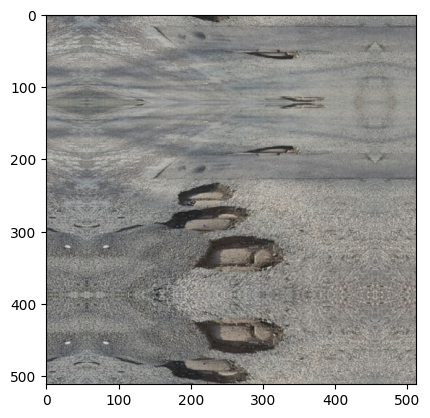

In [7]:
i = random.randint(0, len(dataset))

image, mask = dataset[i]

np_img = image.detach().cpu().numpy().transpose(1, 2, 0)
np_mask = mask.detach().cpu().numpy()
print(np_mask.min(), np_mask.max())

plt.imshow(np_img)



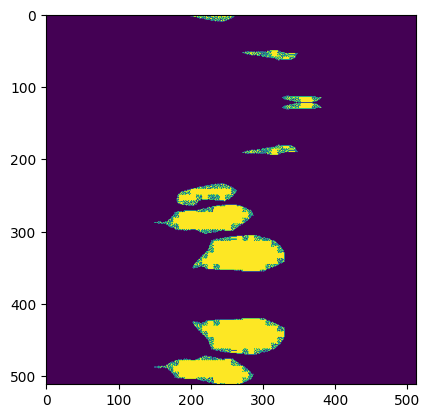

In [9]:
plt.imshow(np_mask)

In [13]:
import numpy as np
import cv2

_mask = cv2.merge([np_mask, np_mask, np_mask])
_mask.shape

(512, 512, 3)

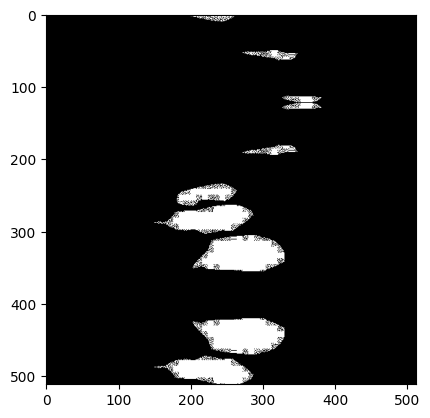

In [15]:
plt.imshow(_mask*255)